Generating sample charts. This can take a while.
Adding file ../Data/raw/1537_keystrokes.txt
Adding file ../Data/raw/1616_keystrokes.txt
Adding file ../Data/raw/1903_keystrokes.txt
Adding file ../Data/raw/1742_keystrokes.txt
Loading sample file ../Data/raw/1537_keystrokes.txt


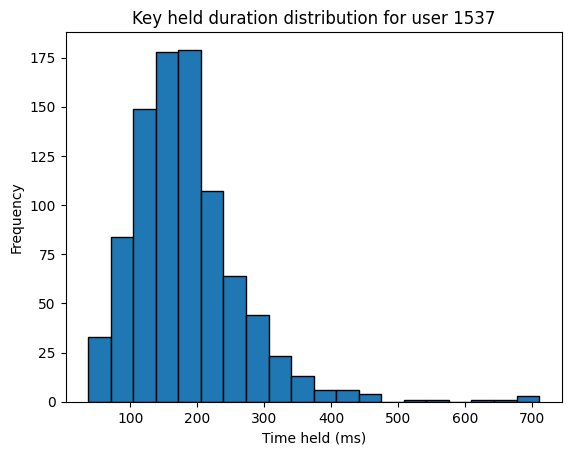

Loading sample file ../Data/raw/1616_keystrokes.txt


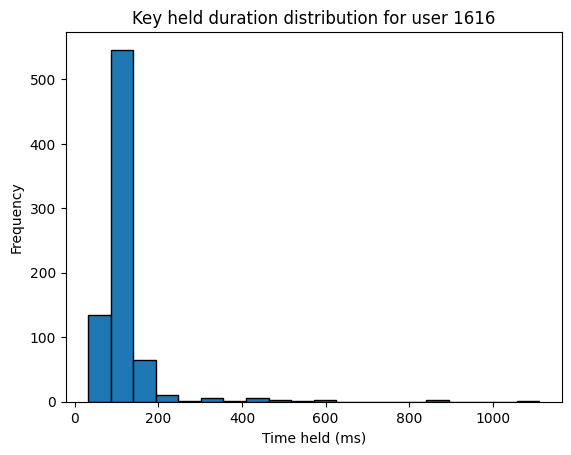

Loading sample file ../Data/raw/1903_keystrokes.txt


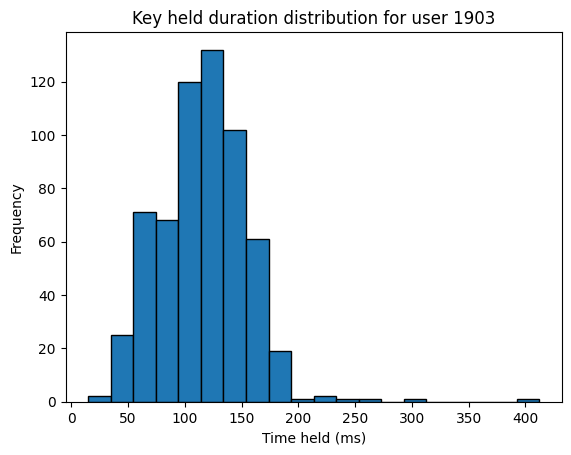

Loading sample file ../Data/raw/1742_keystrokes.txt


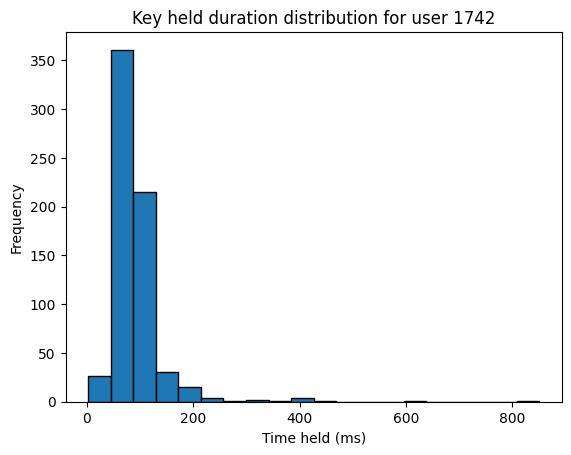

Finished


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import re
%matplotlib inline 

print("Generating sample charts. This can take a while.")

directory = "../Data/raw/"
all_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

files_to_show = []
for i in range(4):
    file_to_add = os.path.join(directory, random.choice(all_files))
    print(f"Selecting file {file_to_add}")
    files_to_show.append(file_to_add)

for file_to_show in files_to_show:
    print(f"Loading sample file {file_to_show}")
    data_frame = pd.read_csv(file_to_show, delimiter='\t')
    data_frame["TIME_HELD"] = data_frame["RELEASE_TIME"] - data_frame["PRESS_TIME"]
    data_frame["KEY_DELAY"] = data_frame["PRESS_TIME"] - data_frame["PRESS_TIME"].shift(-1)
    
    time_held_std_dev = data_frame["TIME_HELD"].std()
    time_held_mean = data_frame["TIME_HELD"].mean()
    
    key_delay_std_dev = data_frame["KEY_DELAY"].std()
    key_delay_std_dev = data_frame["KEY_DELAY"].mean()
    
    plt.hist(data_frame['TIME_HELD'], bins=20, edgecolor='black')
    user_id = re.match(r".*/(\d+)_keystrokes.*", file_to_show).group(1)
    plt.title(f'Key held duration distribution for user {user_id}')
    plt.xlabel('Time held (ms)')
    plt.ylabel('Frequency')
    plt.show()

print("Finished")
